<div style="text-align: right"> 06.12.2019</div>

***Name: Paul Brase*** 

# Hausaufgabe Blatt 7

## Pendel: Energie

In dieser Aufgabe werden wir erneut die Bewegungsgleichung eines Pendels numerisch lösen und dabei dieses mal die Energie des Systems betrachten. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Die nach dem Euler Verfahren diskretisierte Gleichungen lauten:

\begin{align*}
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{1} \\
        \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + 
        \omega\left(t\right) \cdot \Delta t \tag{2}
\end{align*}

Die potentielle Energie $E_p$ und die kinetische Energie $E_{kin}$ sind gegeben durch:
\begin{align*}
E_p &= m \cdot g \cdot L \left( 1 - \cos \varphi \right) \\
E_{kin} &= \frac{m}{2} v^2 = \frac{m}{2}L^2 \dot \varphi ^2
\end{align*}

Die konstante Gesamtenergie ist durch die potentielle Energie bei anfänglicher Auslenkung $\varphi_0$ gegeben
\begin{align*}
E = m \cdot g \cdot L\left(1-\cos \varphi_0\right). \tag{3}
\end{align*}



### 1. Numerische Integration
Auf Blatt 6 haben Sie die Pendelgleichungen (1 + 2) numerisch integriert. Der Code dafür steht in der folgenden Zelle. Führen Sie diesen aus, bevor Sie bei "2. Energie" weiterarbeiten. Hier haben wir $N=2000$ Zeitschritte, wobei $\Delta t=0.004$, $\omega(t=0)=0$ und $\varphi_0 = \varphi(t=0)=\pi/4$ sein soll. Die Länge des Pendels ist $L=1$, die Masse $m=1$ und $g$ die Erdbeschleunigung.  


In [5]:
# numerische Integration der Schwingungsgleichung eines mathematischen Pendels
import numpy as np # lade Bibliotheken

L = 1 # Pendellänge
g = 9.81 # Erdbeschleunigung
m = 1 # Masse
N = 2000 # Anzahl Zeitschritte

dt = 0.004 # Zeitintervall 
w = 0 # Winkelgeschwindigkeit 
phi = (np.pi/4) # Winkel 
t = np.linspace(0, N*dt, N+1) # Zeit
resultsw = [0] # Liste für berechnete Winkelgeschwindigkeit
resultsphi = [np.pi/4] # Liste für berechnete Winkel


for i in range(N): # for-Schleife zur Aktualisierung der Winkelgeschwindigkeit und des Winkels
    wtemp = w # Zwischenspeichern der Winkelgeschwindigkeit,
    w = w - g/L*np.sin(phi)*dt # update omega
    resultsw.append(w) # speichere omega
    phi = phi+wtemp*dt # update phi
    resultsphi.append(phi) # speichere phi

## 2. Energie
**a)** Schreiben Sie eine Funktion, die Ihnen die potentielle, kinetische und gesamte Energie abhängig vom Winkel $\varphi$ und der Winkelgeschwindigkeit $\omega$ berechnet und zurück gibt.

In [6]:
#function for calculating kinetic energy
def E_kin(m, L, w):
    return m/2 * L**2 * w**2
#function for calculating  potential energy
def E_pot(m, g, L, phi):
    return m * g * L * (1 - np.cos(phi))
#function for calculating combined energy (a bit useless)
def E_ges(E_kin, E_pot):
    return E_kin + E_pot

#all functions combined (instructions unclear)
def calc_energy(m, g, L, phi, w):
    E_kin = m/2 * L**2 * w**2
    E_pot = m * g * L * (1 - np.cos(phi))
    E_ges = E_kin + E_pot
    return [E_pot, E_kin, E_ges]
    

**b)** Plotten Sie die kinetische, potentielle und gesamte Energie gegen die Zeit. Vergleichen Sie das Ergebnis mit der erwarteten gesamten Energie (Gleichung (3)). Warum sehen Sie eine Abweichung?

Benutzen Sie zum plotten einer horizontalen Linie `ax.hlines(value, xStart, xEnd)`, wobei `value` der y-Wert und `xStart` und `xEnd` die Anfangs- und End-Punkte der Linie sind.

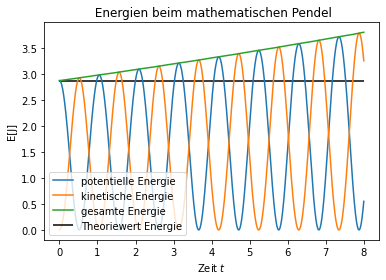

In [10]:
#import this plot thingy
import matplotlib.pyplot as plt


#using t, phi and w from above
#converting it to numpy arrays first though
resultsphi = np.array(resultsphi)
resultsw = np.array(resultsw)

#calculate Energy with fancy function
E = calc_energy(m, g, L, resultsphi, resultsw)

#calculate theoretical energy
E_theo = m * g * L * (1 - np.cos(np.pi/4))


#usual MatPlotLib stuff
fig, ax = plt.subplots()


#plot solutions
ax.set_title(" Energien beim mathematischen Pendel")  # Titel
ax.plot(t, E[0], label='potentielle Energie') 
ax.plot(t, E[1], label='kinetische Energie')
ax.plot(t, E[2], label='gesamte Energie')
ax.hlines(E_theo, t[0], t[-1],label='Theoriewert Energie', color='black') #theoretical solution
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("E[J]")

plt.legend(loc=3)
plt.show()

Es ist auffällig, dass die Gesamtenergie der numerischen Lösung immer weiter ansteigt, während sie theoretisch gesehen eigentlich konstant bleiben müsste. Dieser Fehler entsteht aus der Euler-Methode durch das Integrieren über konstante Zeitschritte. Der Fehler summiert sich immer weiter auf und wird dadurch größer. Dieser Fehler kann durch das Verwenden der sogenannten Leapfrog-Integration verhindert. Diese Methode (nächste Zelle) eignet sich deutlich besser für Bewegungen, da Energieerhaltung erfüllt ist. Im Vergleich zur Euler-Methode wird am Anfang die Geschwindigkeit um einen halben Zeitschritt verschoben und dann immer zuerst integriert, bevor auf gewohnte Weise die Position berechnet wird.

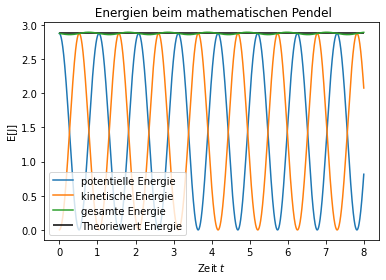

In [11]:
# numerische Integration der Schwingungsgleichung eines mathematischen Pendels
import numpy as np # lade Bibliotheken
#import this plot thingy
import matplotlib.pyplot as plt

L = 1 # Pendellänge
g = 9.81 # Erdbeschleunigung
m = 1 # Masse
N = 2000 # Anzahl Zeitschritte

dt = 0.004 # Zeitintervall 
w = 0 # Winkelgeschwindigkeit 
phi = (np.pi/4) # Winkel 
t = np.linspace(0, N*dt, N+1) # Zeit
resultsw = [] # Liste für berechnete Winkelgeschwindigkeit
resultsphi = [np.pi/4] # Liste für berechnete Winkel



#leapfrog method 
w = w - g/L*np.sin(phi)*0.5*dt
resultsw.append(w) # speichere omega


for i in range(N): # for-Schleife zur Aktualisierung der Winkelgeschwindigkeit und des Winkels
    w = w - g/L*np.sin(phi)*dt # update omega (ZUERST)
    resultsw.append(w) # speichere omega
    phi = phi+w*dt # update phi
    resultsphi.append(phi) # speichere phi
    
    
#function for calculating kinetic energy
def E_kin(m, L, w):
    return m/2 * L**2 * w**2
#function for calculating  potential energy
def E_pot(m, g, L, phi):
    return m * g * L * (1 - np.cos(phi))
#function for calculating combined energy (a bit useless)
def E_ges(E_kin, E_pot):
    return E_kin + E_pot

#all functions combined (instructions unclear)
def calc_energy(m, g, L, phi, w):
    E_kin = m/2 * L**2 * w**2
    E_pot = m * g * L * (1 - np.cos(phi))
    E_ges = E_kin + E_pot
    return [E_pot, E_kin, E_ges]



#using t, phi and w from above
#converting it to numpy arrays first though
resultsphi = np.array(resultsphi)
resultsw = np.array(resultsw)

#calculate Energy with fancy function
E = calc_energy(m, g, L, resultsphi, resultsw)

#calculate theoretical energy
E_theo = m * g * L * (1 - np.cos(np.pi/4))


#usual MatPlotLib stuff
fig, ax = plt.subplots()


#plot solutions
ax.set_title(" Energien beim mathematischen Pendel")  # Titel
ax.plot(t, E[0], label='potentielle Energie') 
ax.plot(t, E[1], label='kinetische Energie')
ax.plot(t, E[2], label='gesamte Energie')
ax.hlines(E_theo, t[0], t[-1],label='Theoriewert Energie', color='black') #theoretical solution
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("E[J]")

plt.legend(loc=3)
plt.show()

Et Voila: Energieerhaltung!
Muss doch safe Zusatzpunkte wert sein...
(Das leichte periodische Schwanken entsteht durch die zeitliche Verschiebung der Winkelgeschwindigkeit) 